# Project 2: Investigate a DataSet

## Baseball Data
- A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This dataset contains many files, but you can choose to analyze only the one(s) you are most interested in.

## Questions about DataSet
- Teams with Highest Average Salaries?
- Division with Highest Average Salaries?
- Highest paid Player?
- Hits impact on Pay?
- Average Payraise?

## Import Pandas

In [76]:
import pandas as pd


## Read CSV File

In [77]:
player_salaries = pd.read_csv('Salaries.csv')
batting_stats = pd.read_csv('Batting.csv')

## How many Entries?
How many Entries are being compared in the DataSet?

In [78]:
len(player_salaries)

25575

## How many Players?
How many unique Players are there in the dataset?

In [79]:
len(player_salaries['playerID'].unique())

4963

## Preview the Dataset

In [80]:
player_salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


## DataSet Statistics

In [81]:
player_salaries.describe()

,yearID,salary
count,25575.000000,2.557500e+04
mean,2000.374389,2.008563e+06
std,8.610604,3.315706e+06
min,1985.000000,0.000000e+00
25%,1993.000000,2.750000e+05
50%,2000.000000,5.500000e+05
75%,2008.000000,2.250000e+06
max,2015.000000,3.300000e+07


## NL vs AL Average Salary?

In [82]:
## Seperate lgID by AL and NL
al_players = (player_salaries[player_salaries['lgID'] == 'AL'])
print '{} = {}'.format ('Number of AL Salaries', len(al_players))
nl_players = (player_salaries[player_salaries['lgID'] == 'NL'])
print '{} = {}'.format ('Number of NL Salaries', len(nl_players))

Number of AL Salaries = 12538
Number of NL Salaries = 13037


In [83]:
## Get average of AL and NL
al_average = al_players['salary'].mean()
nl_average = nl_players['salary'].mean()
print '{} = {}'.format ('The Average AL Salary', (al_average))
print '{} = {}'.format ('The Average NL Salary', (nl_average))

The Average AL Salary = 2039098.18384
The Average NL Salary = 1979196.62


In [84]:
## Max AL
max_al = al_players.max()
print (max_al)

yearID           2015
teamID            TOR
lgID               AL
playerID    zupcibo01
salary       33000000
dtype: object


In [85]:
# Max NL
max_nl = nl_players.max()
print (max_nl)

yearID           2015
teamID            WAS
lgID               NL
playerID    zuvelpa01
salary       32571000
dtype: object


### NL vs AL Pay Conclusion
-The Average AL Salary is \$2,039,098.18
-The Average NL Salary is \$1,979,196.62
-The Highest Paid AL Player made \$33,000,000.00
-The Highest Paid NL Player made \$32,571,000.00

## Average Yearly Pay Change?

In [86]:
## Average Pay Difference Between Years For Every Player who played 2 or more Seasons
import numpy as np
unique_players = player_salaries.groupby('playerID')['salary'].apply(list)
returning_players = unique_players[unique_players.map(len) >= 2]
return_series = returning_players.apply(pd.Series)
pay_diff = np.diff(return_series)
average_payraise = np.nansum(pay_diff) / np.count_nonzero(pay_diff)
print ('The average pay raise is ${:.2f}.'.format(average_payraise))

The average pay raise is $74796.44.


### Average Yearly Pay Change Conclusion
-The Average Pay Raise is \$74,796.44.

## Median Salaries by Team?

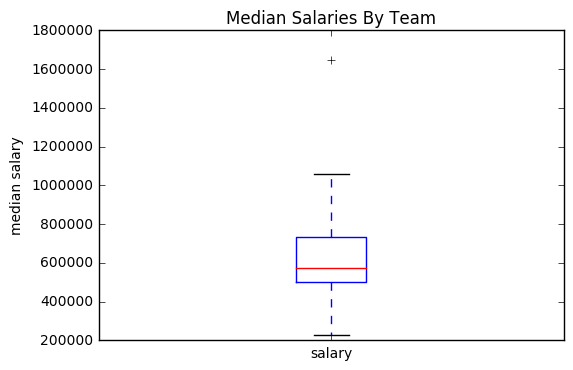

In [87]:
## Median Salary by Team
import matplotlib.pyplot as plt
import pylab
team_salaries=player_salaries.groupby('teamID')['salary'].apply(list)
teamList = team_salaries.to_frame()
teamAverage = teamList['salary'].apply(np.median)
teamAverage.plot.box(x='teamID',y ='salary')
plt.ylabel("median salary")
plt.title ("Median Salaries By Team")
pylab.show()

#### This Graph Shows each teams Median Salary

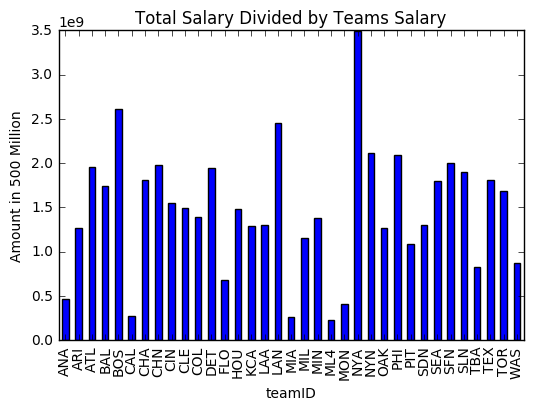

In [88]:
## Total Pay Split by Teams
teamAmount= teamList['salary'].apply(np.sum)
##teamPercent = teamAmount / len(teamAmount) 
teamAmount.plot ('bar')
plt.ylabel("Amount in 500 Million")
plt.title("Total Salary Divided by Teams Salary")
pylab.show()

#### This graph shows the percent of each teams Salary based on total Salary

### Median Salaries By Team Conclusion
- The team with the highest median salary is LAA with \$1,650,000.00

## Hits and Salary?

In [89]:
## Merge Batting CSV into Salary CSV 
battingPay = player_salaries.merge(batting_stats, on=['playerID','yearID'])
hitsPay = battingPay[['playerID','yearID','salary','H']]
hitsPay.head()

,playerID,yearID,salary,H
0,barkele01,1985,870000,0.0
1,bedrost01,1985,550000,5.0
2,benedbr01,1985,545000,42.0
3,campri01,1985,633333,3.0
4,ceronri01,1985,625000,61.0


In [90]:
## Player with Most Hits
print (hitsPay.max())

playerID    zuvelpa01
yearID           2015
salary       33000000
H                 262
dtype: object


### *There is about a 75000 row differnce Between salary and batting csv's. 

In [91]:
## Total Hits divided by Total Salary to get Pay per Hit
totalSalary = hitsPay['salary'].sum()
totalHits = hitsPay['H'].sum()
print ('The average pay per hit is ${:.2f}.'.format(totalSalary / totalHits))

The average pay per hit is $47650.18.


### Hits and Salary Conclusion
- The average pay per hit is \$47,650.18
- The Player with Most hits is also the Highest Paid player.

## Data Wrangling 
When finding the average payraise I limited it to players who have played 2 or more years. Then I had to get the differences of the consecutive values without the nan values getting in the way. When finding the Pay per hit I combined to 2 csvs there was almost a 75000 row difference between the two.

## Conlcusion
In my conclusion I found on average AL salary at \$2,039,098.18 is more than the average NL at \$1,979,196.62. The Highest AL Salary is \$33,000,000.00 and the highest NL is \$32.571,000. The average yearly pay change is \$74,796.44. the Team with the highest Median Salary is LAA at \$1,650,000.00. The Average Pay Per Hit is \$47,650.18. Some limitations on my data was that the batting and salary files didnt match up well. The batting file had data for 101332 different players and years. And the salary file only had 25575 different players and years. This makes it so that around 75000 players batting statistics cant be used because they didnt have a salary to go with them.